In [ ]:
#import the necessary libraries required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn import metrics

#%matplotlib notebook
%matplotlib inline

In [ ]:
housing = pd.read_csv("housing.csv")

In [ ]:
# Split the dataset into 80% train and 20% test dataset
housing_ind = housing.drop("median_house_value",axis=1)
print(housing_ind.head())
housing_dep = housing["median_house_value"]
print("Medain Housing Values")
print(housing_dep.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY  
Medain Housing Values
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [ ]:
housing_reduce = housing[housing['median_house_value']!=500001]

In [ ]:
housing_reduce.shape

(19675, 10)

Text(0, 0.5, 'median_house_value')

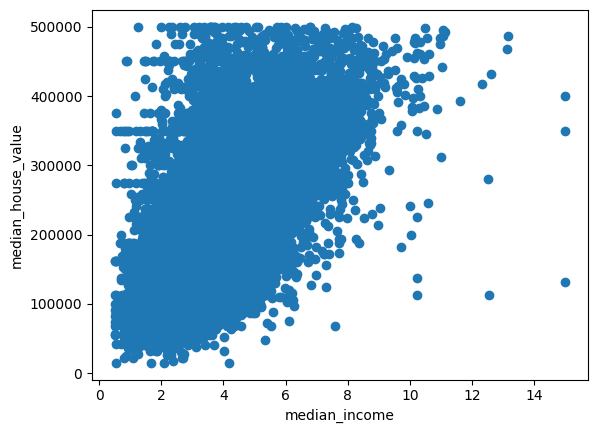

In [ ]:
plt.scatter(housing_reduce['median_income'],housing_reduce['median_house_value'])
plt.xlabel('median_income')
plt.ylabel('median_house_value')

In [ ]:
housing[housing['median_house_value']>500000 ].groupby(['ocean_proximity']).count()['longitude']

ocean_proximity
<1H OCEAN     532
INLAND         27
NEAR BAY      194
NEAR OCEAN    212
Name: longitude, dtype: int64

In [ ]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
def getOutliers(dataframe,column):
    column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    #b = df[(df['a'] > 1) & (df['a'] < 5)]
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]

    print("Outliers out of total = {} are \n {}".format(housing[column].size,len(data[column])))
    #remove the outliers from the dataframe
    outlierRemoved = housing[~housing[column].isin(data[column])]
    return outlierRemoved

In [ ]:
#get the outlier
df_outliersRemoved = getOutliers(housing,"total_rooms")

(IQR = 1700.25)Outlier are anything outside this range: (-1102.625,5698.375)
Outliers out of total = 20640 are 
 1287


In [ ]:
#impute missing values
print(housing.iloc[:,4:5].head())
imputer =  SimpleImputer(strategy ="median")
imputer.fit(housing.iloc[:,4:5])
housing.iloc[:,4:5] = imputer.transform(housing.iloc[:,4:5])
housing.isnull().sum()

   total_bedrooms
0           129.0
1          1106.0
2           190.0
3           235.0
4           280.0


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
labelEncoder = LabelEncoder()
print(housing["ocean_proximity"].value_counts())
housing["ocean_proximity"] = labelEncoder.fit_transform(housing["ocean_proximity"])
housing["ocean_proximity"].value_counts()
housing.describe()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [ ]:
housing_ind = housing.drop("median_house_value",axis=1)
print(housing_ind.head())
housing_dep = housing["median_house_value"]
print("Medain Housing Values")
print(housing_dep.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity  
0       322.0       126.0         8.3252                3  
1      2401.0      1138.0         8.3014                3  
2       496.0       177.0         7.2574                3  
3       558.0       219.0         5.6431                3  
4       565.0       259.0         3.8462                3  
Medain Housing Values
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [ ]:
#check for rand_state
X_train,X_test,y_train,y_test = train_test_split(housing_ind,housing_dep,test_size=0.2,random_state=42)

In [ ]:
#Standardize training and test datasets.
#==============================================================================
# Feature scaling is to bring all the independent variables in a dataset into
# same scale, to avoid any variable dominating  the model. Here we will not 
# transform the dependent variables.
#==============================================================================
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196    2.00593172]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338  2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145  2.00593172]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438  2.00593172]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.1124266 ]]
test data
[[ 0.28534728  0.1951     -0.28632369 -0.52286157 -0.24701249 -0.03030109
  -0.37008673 -1.15508475 -0.1124266 ]
 [ 0.06097472 -0.23549054  0.11043502  0.13841528 -0.24701249  0.12185077
   0.220532   -0.70865905 -0.1124266 ]
 [-1.42487026  1.00947776  1.85617335  0.54630997 -0.24701249 -0.10241931
   1.21539643 -0.21040155  1.29981228]
 [ 0.42994293 -0.63799909 -0.92113763  0.18808002 -0.24701249  0.24497944
  -0.013090

In [ ]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train,y_train)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is 207194.69373788778
coefficients  is [-85854.94724101 -90946.06271148  14924.30655143 -17693.23405277
  48767.60670995 -43884.16852449  17601.31495096  77144.10164179
   -451.52015229]


In [ ]:
#predict on the test data
y_pred = linearRegModel.predict(X_test)

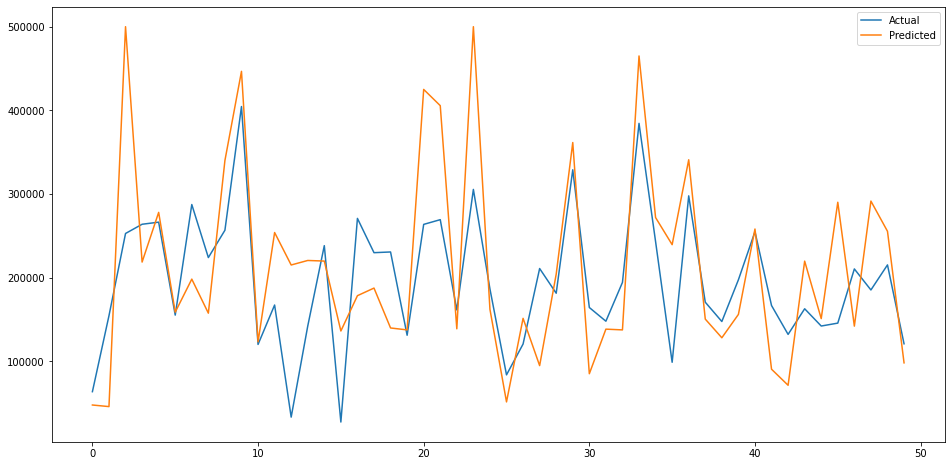

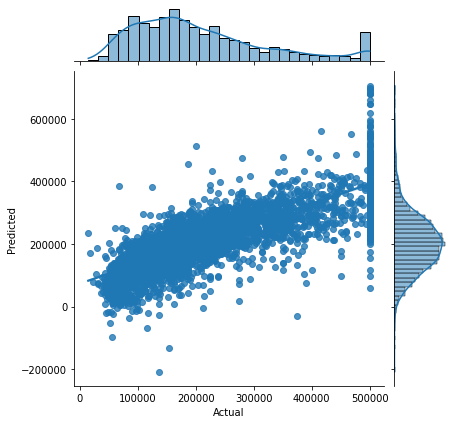

In [ ]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [ ]:
#prediction error
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

71147.87146118376


In [ ]:
from tensorflow import keras 
from tensorflow import random

In [ ]:
###Build 2 layer NN for prediction
opt = keras.optimizers.Adam()
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[9]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer=opt)


In [ ]:
model.fit(X_train,y_train,epochs=500,verbose=1,callbacks=[callback])

Epoch 1/500
516/516 [==============================] - 4s 5ms/step - loss: 55913078784.0000
Epoch 2/500
516/516 [==============================] - 3s 6ms/step - loss: 48218238976.0000
Epoch 3/500
516/516 [==============================] - 4s 8ms/step - loss: 33148934144.0000
Epoch 4/500
516/516 [==============================] - 1s 2ms/step - loss: 25859217408.0000
Epoch 5/500
516/516 [==============================] - 1s 2ms/step - loss: 22593724416.0000
Epoch 6/500
319/516 [=================>............] - ETA: 0s - loss: 20624838656.0000

KeyboardInterrupt: ignored

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2)
interact_train = poly.fit_transform(X_train)[:,10:]
interact_test = poly.fit_transform(X_test)[:,10:]
X_train_int = np.concatenate((X_train,interact_train),axis=1)
X_test_int = np.concatenate((X_test,interact_test),axis=1)

In [ ]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train_int,y_train)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))
y_pred = linearRegModel.predict(X_test_int)

In [ ]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [ ]:
#prediction error
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
opt = keras.optimizers.Adam()
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[54]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer=opt)

In [ ]:
model.fit(X_train_int,y_train,epochs=500,verbose=1,callbacks=[callback])

In [ ]:
y_pred = model.predict(X_test_int)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
### delete truncated 500001 case
y_test_delete = y_test[y_test <= 500000]
x_test_delete = X_test[y_test <= 500000]
x_train_delete = X_train[y_train <= 500000]
y_train_delete = y_train[y_train <= 500000]

In [ ]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(x_train_delete,y_train_delete)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))
y_pred = linearRegModel.predict(x_test_delete)
print(np.sqrt(metrics.mean_squared_error(y_test_delete,y_pred)))

Intercept is 201842.4519228545
coefficients  is [-79766.14421852 -83533.15730707  12809.81896386 -20481.49019646
  44556.65291912 -35260.79355265  16090.35361651  75879.53500647
   -637.47350157]
62934.35341173266


In [ ]:
opt = keras.optimizers.Adam()
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[9]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer=opt)

In [ ]:
model.fit(x_train_delete,y_train_delete,epochs=500,verbose=0,callbacks=[callback])

In [ ]:
y_pred = model.predict(x_test_delete)
print(np.sqrt(metrics.mean_squared_error(y_test_delete,y_pred)))

124/124 [==============================] - 0s 2ms/step
69884.49650980128


In [ ]:
y_test_log= np.log(y_test)
y_train_log = np.log(y_train)

In [ ]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train,y_train_log)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))
y_pred = linearRegModel.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test_log,y_pred)))

Intercept is 12.086494015640412
coefficients  is [-0.56755172 -0.60735249  0.04315861 -0.06381105  0.20319673 -0.20315876
  0.09732722  0.33879352 -0.0213045 ]
0.3500623858939064


In [ ]:
opt = keras.optimizers.Adam()
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[9]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer=opt)

In [ ]:
model.fit(X_train,y_train_log,epochs=500,verbose=0,callbacks=[callback])

In [ ]:
y_pred = model.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test_log,y_pred)))

129/129 [==============================] - 0s 1ms/step
0.33148491704490113


In [ ]:
import statsmodels.api as sm


In [ ]:
X_train = sm.add_constant(X_train)

In [ ]:
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3261.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        03:25:37   Log-Likelihood:            -2.0749e+05
No. Observations:               16512   AIC:                         4.150e+05
Df Residuals:                   16502   BIC:                         4.151e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.072e+05    539.942    383.735      0.0

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
#longitude, latitutde and median income 3 most important.
opt = keras.optimizers.Adam()
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[3]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer=opt)

In [ ]:
X_train_red = pd.DataFrame(X_train).iloc[:,[1,2,3,6,8]]

In [ ]:
model.fit(X_train_red,y_train,epochs=500,verbose=0,callbacks=[callback])


In [ ]:
y_pred = model.predict(pd.DataFrame(X_test).iloc[:,[0,1,7]])
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

129/129 [==============================] - 0s 2ms/step
72688.58166432116


In [ ]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train_red,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
y_pred = linearRegModel.predict(pd.DataFrame(X_test).iloc[:,[0,1,7]])
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1404194.8632828095


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- longitude
- median_income
Feature names seen at fit time, yet now missing:
- housing_median_age
- ocean_proximity

  warnings.warn(message, FutureWarning)


In [ ]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train_red,y_train)
y_pred = linearRegModel.predict(pd.DataFrame(X_test).iloc[:,[0,1,2,5,7]])
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1294421.843557973


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- longitude
- median_income
- population
Feature names seen at fit time, yet now missing:
- households
- ocean_proximity
- total_rooms

  warnings.warn(message, FutureWarning)


In [ ]:
poly = PolynomialFeatures(3)
interact_train = poly.fit_transform(X_train)[:,10:]
interact_test = poly.fit_transform(X_test)[:,10:]
X_train_int = np.concatenate((X_train,interact_train),axis=1)
X_test_int = np.concatenate((X_test,interact_test),axis=1)

In [ ]:
data_train_int3 = pd.DataFrame(X_train_int)
data_train_int3['y'] = pd.DataFrame(y_train).reset_index()['median_house_value']
data_test_int3 = pd.DataFrame(X_test_int)
data_test_int3['y'] = pd.DataFrame(y_test).reset_index()['median_house_value']

In [ ]:
data_train_int3.to_csv('cali_house_3order_train.csv')
data_test_int3.to_csv('cali_house_3order_test.csv')

In [ ]:
from google.colab import files

files.download('cali_house_3order_train.csv')
files.download('cali_house_3order_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train_int,y_train)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))
y_pred = linearRegModel.predict(X_test_int)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Intercept is 182355.90846616827
coefficients  is [-1.54486543e+05 -1.68110118e+05  1.32554378e+04 -4.32126450e+04
  1.45230622e+05 -1.34350137e+05  2.99407442e+04  9.29825118e+04
 -3.71137325e+04  1.92654037e+04  6.24424845e+04 -3.63737975e+04
  1.35263132e+05 -1.06925451e+05  5.99655276e+04 -9.19438682e+04
 -7.07986445e+04 -1.07318933e+05  3.87032923e+04 -4.59782348e+04
  1.54812836e+05 -1.61649184e+05  6.51014932e+04 -6.54329577e+04
 -8.31936962e+04 -1.22152524e+05  2.32871746e+03 -1.19370702e+04
  1.45190784e+04 -3.17906818e+04  3.17234311e+04  1.22007339e+04
  5.09765355e+03 -2.07788540e+04  7.10972291e+04 -1.42217369e+04
 -1.92211009e+04  6.53877276e+04 -5.55651899e+03 -1.16326888e+05
 -7.91307955e+04  2.01904589e+05 -9.98693555e+03  4.47759300e+04
  3.36058614e+04  5.62800738e+04 -3.94919178e+04 -7.21408881e+03
 -1.13193802e+05  2.06729924e+02 -2.80772065e+04  9.76836989e+01
  1.01122562e+04  1.33159504e+04  3.46811051e+03  1.46101668e+03
  9.03984577e+03  2.03994023e+04 -2.01549

In [ ]:
opt = keras.optimizers.Adam()
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[219]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer=opt)

In [ ]:
model.fit(X_train_int,y_train,epochs=500,verbose=1,callbacks=[callback])

Epoch 1/500
516/516 [==============================] - 2s 2ms/step - loss: 55913861120.0000
Epoch 2/500
516/516 [==============================] - 1s 3ms/step - loss: 43535126528.0000
Epoch 3/500
516/516 [==============================] - 1s 3ms/step - loss: 32226750464.0000
Epoch 4/500
516/516 [==============================] - 2s 4ms/step - loss: 28805050368.0000
Epoch 5/500
516/516 [==============================] - 2s 3ms/step - loss: 25721538560.0000
Epoch 6/500
516/516 [==============================] - 1s 3ms/step - loss: 21983121408.0000
Epoch 7/500
516/516 [==============================] - 1s 3ms/step - loss: 16008379392.0000
Epoch 8/500
516/516 [==============================] - 1s 2ms/step - loss: 12279681024.0000
Epoch 9/500
516/516 [==============================] - 1s 2ms/step - loss: 9445881856.0000
Epoch 10/500
516/516 [==============================] - 1s 2ms/step - loss: 8111804928.0000
Epoch 11/500
516/516 [==============================] - 1s 2ms/step - loss: 74986

In [ ]:
y_pred = model.predict(pd.DataFrame(X_test_int))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

129/129 [==============================] - 0s 2ms/step
62637.13797259325
